# EDA 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [3]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [5]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [6]:
df1= df.isnull().sum()
df2=df1[df1 >0]
print(df2)

host_response_time             19006
host_response_rate             19006
host_acceptance_rate           14015
host_is_superhost                  5
host_listings_count                5
host_total_listings_count          5
host_has_profile_pic               5
host_identity_verified             5
bathrooms                         54
bedrooms                          77
beds                             482
square_feet                    50407
weekly_price                   45411
monthly_price                  46119
security_deposit               17325
review_scores_rating           11431
review_scores_accuracy         11466
review_scores_cleanliness      11452
review_scores_checkin          11479
review_scores_communication    11463
review_scores_location         11482
review_scores_value            11482
license                        50759
jurisdiction_names             50781
reviews_per_month              10453
dtype: int64


In [7]:
df3= (df.isnull().sum() / len(df) *100).round(1)
df4= df3[df3>0]
print(df4)

host_response_time              37.4
host_response_rate              37.4
host_acceptance_rate            27.6
bathrooms                        0.1
bedrooms                         0.2
beds                             0.9
square_feet                     99.2
weekly_price                    89.4
monthly_price                   90.8
security_deposit                34.1
review_scores_rating            22.5
review_scores_accuracy          22.6
review_scores_cleanliness       22.5
review_scores_checkin           22.6
review_scores_communication     22.6
review_scores_location          22.6
review_scores_value             22.6
license                         99.9
jurisdiction_names             100.0
reviews_per_month               20.6
dtype: float64


In [8]:
df5= pd.concat([df2.to_frame(), df4.to_frame()], axis=1)
df5.columns=['missing_num','missing_%']

df6= df5.sort_values('missing_num', ascending=False)
df6= df6.dropna()
df6

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

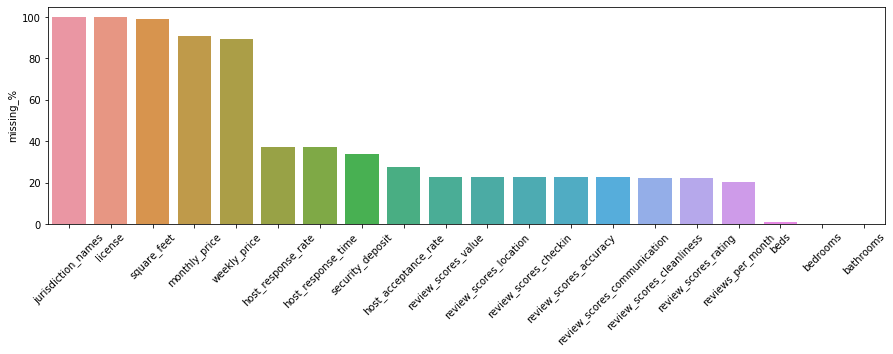

In [9]:
plt.figure(figsize = (15,4))
sns.set_palette("pastel")
sns.barplot(x=df6.index, y='missing_%', data=df6)

for item in sns.barplot(x=df6.index, y='missing_%', data=df6).get_xticklabels():
    item.set_rotation(45)


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [10]:
df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [11]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [12]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

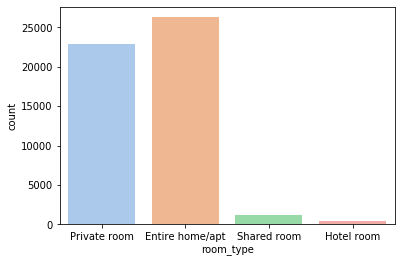

In [14]:
sns.countplot(x='room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

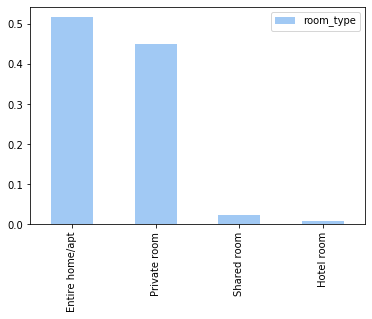

In [61]:
df7 = pd.DataFrame(df['room_type'].value_counts() / df['room_type'].count())
df7.plot(kind='bar')

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

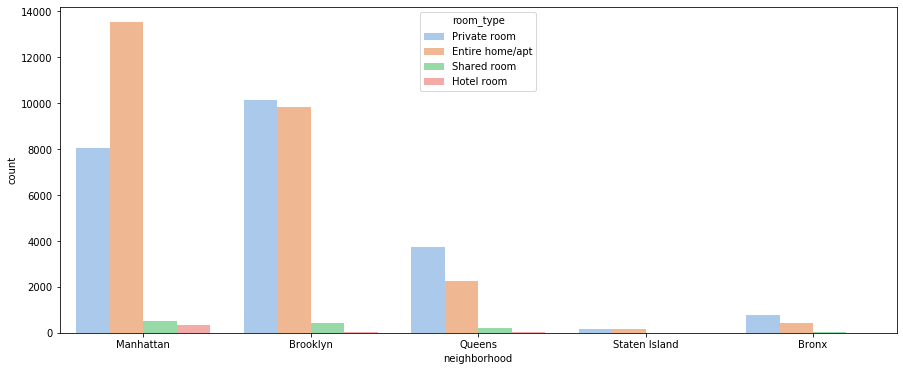

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x='neighborhood', data=df, hue = 'room_type')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

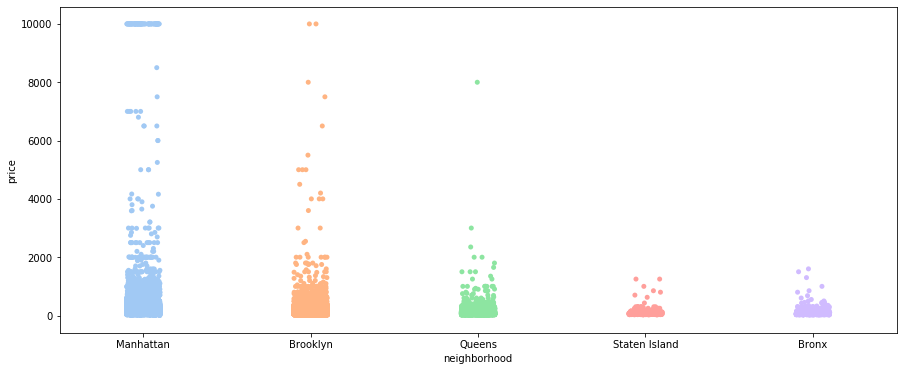

In [43]:
plt.figure(figsize=(15,6))
sns.stripplot(x='neighborhood', y='price', data=df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
일단, 위 자료에서 neighborhood로 제시된 지역은 뉴욕의 다섯 개 자치구에 해당합니다.

위 그래프들로 부터 알 수 있는 사실은
맨해튼과 브루클린에 있는 airbnb방에 대해 소비자들은 높은 가격을 지불할 용의가 있다는 것 입니다.
이에 비해 퀸즈 지역의 airbnb 방에 대해서는 최대 지불 용의가 낮아지며,
스태튼 아일랜드와 브롱크스에서는 지불 용의가 더 낮아져, 책정된 가격대가 비교적 더 낮아집니다.

그 이유는 airbnb로 숙소를 빌리는 사람들의 특성과 각 자치구 만의 문화적, 지리적 차이 때문이라고 생각합니다.

airbnb 로 숙소를 빌리는 사람들은 대부분 여행 혹은 다른 목적을 위해 비교적 짧은 기간 지내는 사람들입니다.
그렇기에 그들은 외부인들도 안전하고 편리하게 생활할 수 있는 지역에 방을 빌리기를 선호하는데, 
관광지가 많이 발달되어 있거나 도시의 중심부에 위치하고 있어서 교통이 편리하고 치안이 좋은 지역들이 이에 해당합니다.

소비자들이 선호하는 지역에 해당하는 예시가 바로 맨해튼과 브루클린 입니다.
맨해튼은 뉴욕의 중심으로, 타임스퀘어, 브로드웨이, 센트럴파크 등 유명한 관광지가 모여있는 곳이며,
브루클린은 최근 힙한 지역으로 떠오르며 관광지들이 새롭게 많이 개발되고 있는 곳입니다.
관광지가 잘 개발되어 있다는 것은, 외부인이 생활하기에 편리하도록 많은 서비스들과 인프라가 구축되어 있다는 것입니다.
그렇기에 맨해튼과 브루클린은, 다른 자치구들에 비해 가격이 상당히 높게 책정된 경우들이 제법 많습니다.
다른 자치구들에 비해 가격의 범위도 넓으며, 다른 자치구에서는 보이지 않는 수준의 높은 가격도 존재합니다.

퀸즈는 뉴욕 JFK 공항이 있어서 접근성이 좋고, 맨해튼 중심부까지 15분이면 이동 가능한 풍부한 지하철 노선이 존재합니다.
아주 멋있거나 아늑한 동네는 아니지만 교통편이 좋기 때문에, 
가격과 적당히 타협한 소비자들이 이 곳에서 방을 구할 가능성이 높습니다.
그렇기에 맨해튼과 브루클린 만큼 자료의 개수가 풍부하거나, 가격이 높게 책정되어 있지는 않지만,
스태튼 아일랜드와 브롱크스와 비교해서는 많은 자료들이 있으며 가격도 더 넓은 범위로, 비교적 높은 수준으로 책정되어 있습니다.

스태튼 아일랜드는 뉴욕시의 가장 외곽에 위치해 있으며, 한적한 분위기의 도시입니다.
중산층의 지역주민들이 많이 사는 도시이긴 하지만, 관광지는 아닙니다.
브롱크스는 가장 북부에 있는 자치구로, 미국에서 가장 가난한 5개의 구역 중 하나인 15구역을 품고 있으며,
70년대에는 높은 실직률과 빈곤율, 범죄율, 만연한 불법 마약남용 때문에 사람이 살기 어려운 동네였습니다.
최근에는 이런 사회적 문제들이 많이 개선되어, 문화적으로 다양한 동네들이 브롱크스 자치구를 이루고 있지만 
몇 구역은 여전히 외부인들이 쉽게 접근할 수 없는 구역입니다.
이러한 이유로, 스태튼 아일랜드와 브롱크스는 airbnb 소비자들에게 큰 이점을 갖지 못하기에,
이 지역은 대부분 낮은 가격에 숙소를 이용하고 싶은 소비자들이 찾았을 것이라고 유추해볼 수 있습니다.
그렇기에 이 지역에 대해 전체적인 자료의 수도 적으며, 가격 수준도 낮게 책정되어 있습니다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

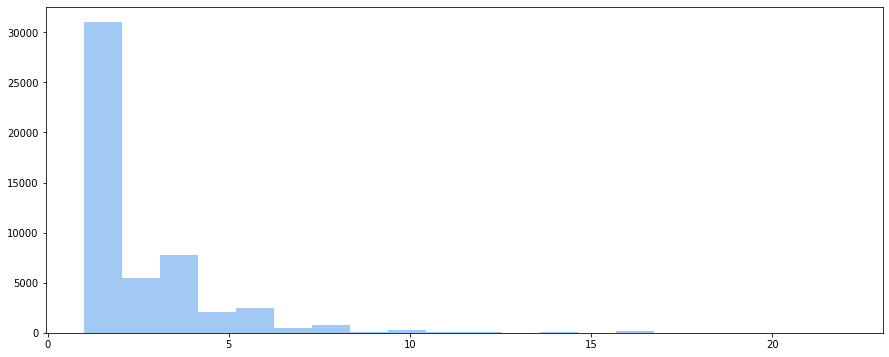

In [54]:
plt.figure(figsize=(15,6))
plt.hist(x="accommodates", data=df, bins=20)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

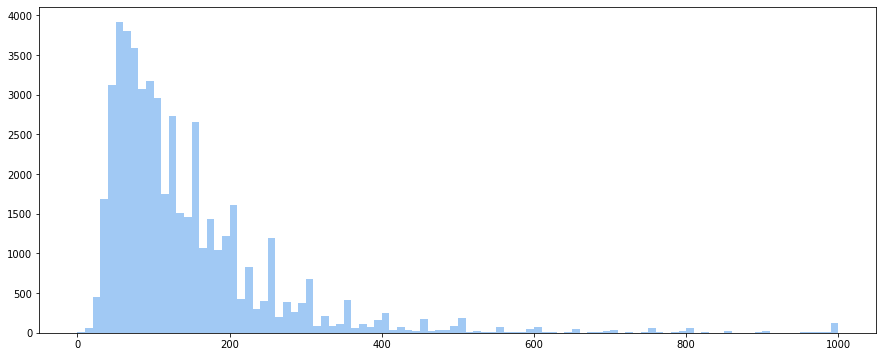

In [59]:
plt.figure(figsize=(15,6))
plt.hist(x = "price", data = df, bins = 100, range=[0,1000])
plt.show()

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

시각화한 자료를 바탕으로 실제 특성들을 가공하는 방법에 대해서는 

<font color='orange'> 다음 시간인 FE 시간에 배우게 될 예정입니다.

다음 시간에 봐요!

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. </font>

* Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>

